<a href="https://colab.research.google.com/github/kelecheeii/ML-Code/blob/main/Loan_Status_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

About Dataset

The loan approval dataset is a collection of financial records and associated information used to determine the eligibility of individuals or organizations for obtaining loans from a lending institution. It includes various factors such as cibil score, income, employment status, loan term, loan amount, assets value, and loan status. This dataset is commonly used in machine learning and data analysis to develop models and algorithms that predict the likelihood of loan approval based on the given features.


In [13]:
# This imports necessary libraries for data manipulation and visualisation

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# Suppressing warnings for cleaner output

import warnings

warnings.filterwarnings('ignore')

In [15]:
# Importing the module that will enable the user upload a file in google colab

from google.colab import files

uploaded = files.upload()

Saving loan_approval_dataset.xlsx to loan_approval_dataset.xlsx


In [16]:
# Loading our dataset into a pandas dataframe

data = pd.read_excel('loan_approval_dataset.xlsx')

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


When we check the info of our data, we see there are no null values. below we still making sure by checking for null values.


In [18]:
# Checking for null values, we see that all our columns have 0 null values.

data.isnull().sum()

,0
loan_id,0
no_of_dependents,0
education,0
self_employed,0
income_annum,0
loan_amount,0
loan_term,0
cibil_score,0
residential_assets_value,0
commercial_assets_value,0


In [19]:
# additional cleaning step that trims any white space from our column names

data.columns = data.columns.str.strip()

In [20]:
# Checking the first five rows of data to see what the content of our data looks like.

data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


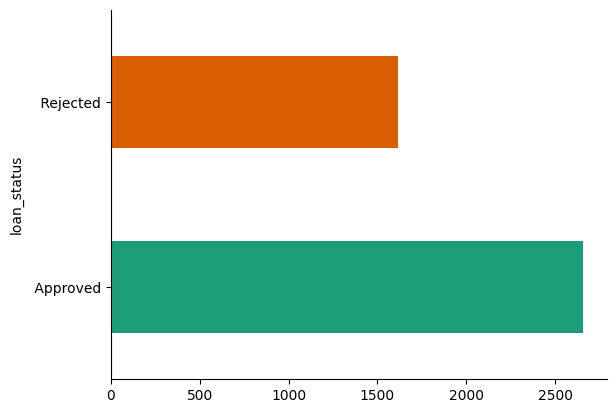

In [22]:
# we vsualize a count of how many loan approvals and rejections contained in our data

data.groupby('loan_status').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [23]:
# Creating our features and target (X,y) respectively

X = data.drop('loan_status', axis=1)
y = data['loan_status']

In [24]:
# We check to confirm that our Feature and Target (X,y) variables were created properly.

print(X.shape)
print(y.shape)

(4269, 12)
(4269,)


In [25]:
# We import all the libraries needed to build our preprocessing pipeline
# Our preprocessing steps include scaling numerical values and encoding categorical values.

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [26]:
# We also import all the models we plan to train on our data, and then select the best one.

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn import set_config

In [46]:
# Lets build our pipeline

numeric_transformer = StandardScaler()

categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer( transformers = [('num', numeric_transformer, make_column_selector(dtype_exclude='object')),
                                                  ('cat', categorical_transformer, make_column_selector(dtype_include='object'))])


pipe = Pipeline(steps= [('preprocessor', preprocessor),
                        ('model', LogisticRegression(max_iter=1000))])

In [47]:
# Here we split our data into Training and Test sets.

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25, random_state=47, stratify=y)

In [48]:
# We build a grid for all parameters of our models, the aim is to get the best model and tuning parameters.

param_grid = [

    {'model': [LogisticRegression(max_iter=1000)],
     'preprocessor': [preprocessor],
     'model__C': [0.1, 1.0, 10, 100]},

    {'model': [KNeighborsClassifier()],
     'preprocessor': [preprocessor],
     'model__n_neighbors': [2, 4, 6, 8, 10],
     'model__weights': ['uniform','distance']},

    {'model': [RandomForestClassifier()],
     'preprocessor': [preprocessor],
     'model__n_estimators': [50, 100, 150, 200, 250, 300],
     'model__max_depth': [1, 2, 3]},

    {'model': [SVC()],
     'preprocessor': [preprocessor],
     'model__kernel': ['linear', 'poly', 'rbf'],
     'model__C': [0.1, 1.0, 10, 100]}

    ]


grid_search = GridSearchCV(pipe, param_grid, cv=5, return_train_score=True)

In [49]:
# We instatiate our parameter grid on our training data to find the best model and parameters.

grid_search.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7ba591e585e0>),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7ba591cbb2b0>)])),
                                       ('model',
                                        LogisticRegr...
                          'model__kernel': ['linear', 'poly', 'rbf'],
                          'preprocessor': [ColumnTransformer(transformers=[('num',
                                                                            StandardScaler(),
                                                                            <sklearn.compose._column_transformer.make_column_selector object at 0x7ba591e585e0>),
                                                                           ('cat',
                                                                            OneHotEncoder(handle_unknown='ignore'),
                                                                            <sklearn.compose._column_transformer.make_column_selector object at 0x7ba591cbb2b0>)])]}],
             return_train_score=True)

In [58]:
best_model = grid_search.best_estimator_

In [59]:
# Printing our best model and results

print("Best params:\n{}\n".format(grid_search.best_params_))
print("Best cross-validation train score: {:.2f}".format(grid_search.cv_results_['mean_train_score'][grid_search.best_index_]))
print("Best cross-validation test score: {:.2f}".format(grid_search.best_score_))
print("Test-set score: {:.2f}".format(grid_search.score(X_test, y_test)))

Best params:
{'model': RandomForestClassifier(), 'model__max_depth': 3, 'model__n_estimators': 250, 'preprocessor': ColumnTransformer(transformers=[('num', StandardScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7ba591e585e0>),
                                ('cat', OneHotEncoder(handle_unknown='ignore'),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7ba591cbb2b0>)])}

Best cross-validation train score: 0.97
Best cross-validation test score: 0.96
Test-set score: 0.96


In [60]:
# Define the variables
best_params = grid_search.best_params_
best_train_score = grid_search.cv_results_['mean_train_score'][grid_search.best_index_]
best_cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)

# Create the DataFrame
best_results = pd.DataFrame({
    'Metric': ['Best cross-validation train Score', 'Best cross-Validation test Score', 'Test-set score'],
    'Value': [best_train_score, best_cv_score, test_score]
})

# Display DataFrame
best_results

,Metric,Value
0,Best cross-validation train Score,0.971336
1,Best cross-Validation test Score,0.963765
2,Test-set score,0.962547


In [61]:
# Finally, we conduct an error analysis to see how accurate our model was in classification.

from sklearn.metrics import accuracy_score
y_test_pred = best_model.predict(X_test)
validation_score = accuracy_score(y_test_pred, y_test)

In [64]:
from sklearn.metrics import confusion_matrix
Conf_Mat = confusion_matrix(y_test,y_test_pred )
my_labels = ['Approved','Rejected']
print(Conf_Mat)

[[649  15]
 [ 25 379]]


Text(0.5, 1.0, 'Confusion Matrix')

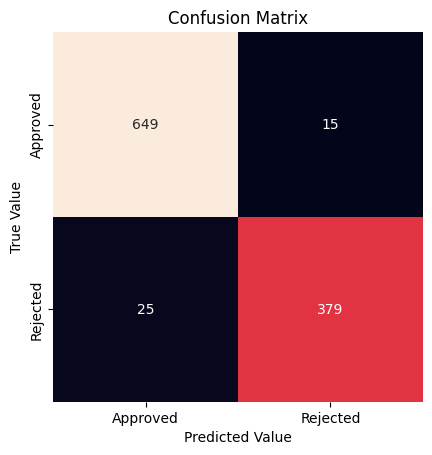

In [65]:
sns.heatmap(Conf_Mat, square=True, annot=True, cbar=False, fmt='d', xticklabels=my_labels, yticklabels=my_labels)
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.title('Confusion Matrix')

Explanation of Values
1.	True Positives (TP = 649):
	The model correctly identified 649 cases as positive.
2.	False Negatives (FN = 15):
	15 actual positive cases were incorrectly predicted as negative.
	This represents missed positive cases.
3.	False Positives (FP = 25):
	25 actual negative cases were incorrectly predicted as positive.
	This represents false alarms or type I errors.
4.	True Negatives (TN = 379):
	The model correctly identified 379 cases as negative.
